# Adjusted SIR model lab

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize

TODO we need to find out what each compartment means. I think it's modeling the stages of cancer but idk

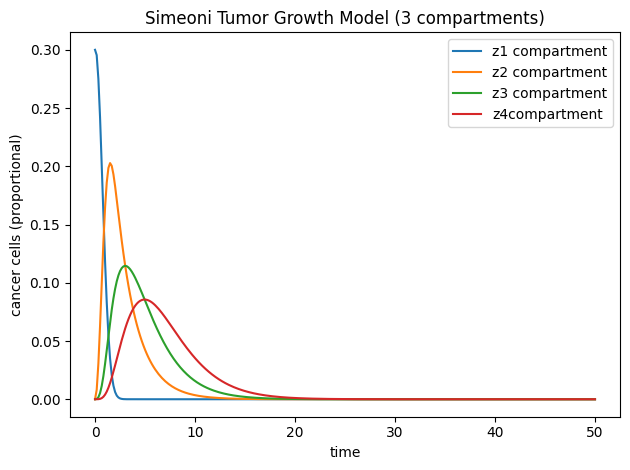

In [20]:
def simeoni_3(lambda0=.5, lambda1=.2, psi=.5, k1 = .4, k2=.5, c=lambda t: t*k1, V0 = 3):
    '''
    Adjusting the the SIR model, model the spread cancer in a body
    it plots the results of cancer cells over time

    Parameters:
    Tumor growth function values:
        lambda0 - default .5
        lambda1 - default .2
        psi - default .5
    
    c(t) denotes the concentration of a chemotherapeutic or immunotherapeutic agent 
    V0 - default = 3
    '''
    
        
    #ode system
    def ode(t, Y):
        
        Z1 = Y[0]
        Z2 = Y[1]
        Z3 = Y[2]
        Z4 = Y[3]
        def TGF(t):
            return (lambda0 * Y[0]) /(1+(lambda0/lambda1)**psi)**(1/psi)
        
        dZ1 = TGF(t) - k1*c(t)*Z1
        dZ2 = k1*c(t)*Z1 - k2*Z2
        dZ3 = k2*Z2 - k2*Z3
        dZ4 = k2*Z3 -k2*Z4

        return np.array([dZ1, dZ2, dZ3, dZ4])

    # Time domain
    t0 = 0
    tf = 50
    t = np.linspace(t0,tf,300)

    # total cells and inital conditions
    #initial cancer level = Y0
    
    Y0 = np.array([V0,0,0,0])
    

    # solve it
    sol = solve_ivp(ode, (t0,tf), Y0, t_eval=t).y

    plt.plot(t,sol[0], label='z1 compartment')
    plt.plot(t,sol[1], label='z2 compartment')
    plt.plot(t,sol[2], label='z3 compartment')
    plt.plot(t,sol[3], label='z4compartment')


    plt.xlabel('time')
    plt.ylabel('cancer cells (proportional)')
    plt.title("Simeoni Tumor Growth Model (3 compartments)")
    plt.legend()
    plt.tight_layout()
    plt.show()

#TODO find good constants
lambda0 = .5
lambda1=.2
psi = .5
k1 = .4
k2=.5
V0 = 3

def c(t):
    """induces a fraction of tumor cells to commit
        to cell death with a killing constant k1"""
    return 5*t #TODO idk what the c is 
simeoni_3(lambda0=.5, lambda1=.2, psi=.5, k1 = .4, k2=.5, c=c, V0 = .3)

consts = 0.1


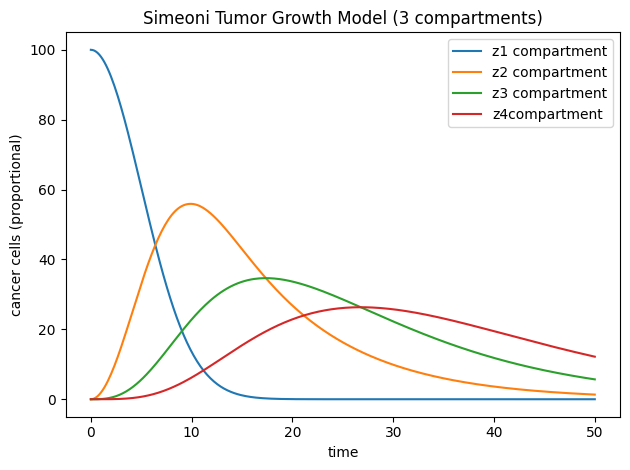

consts = 0.2


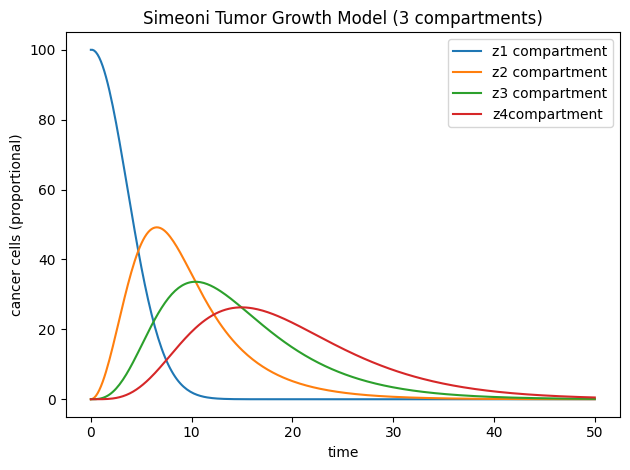

consts = 0.3


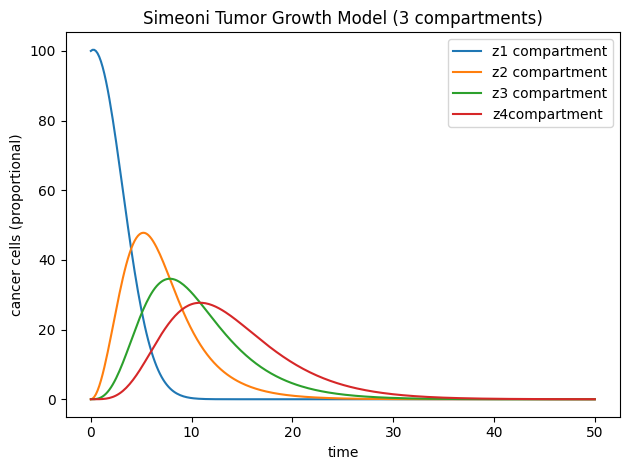

consts = 0.4


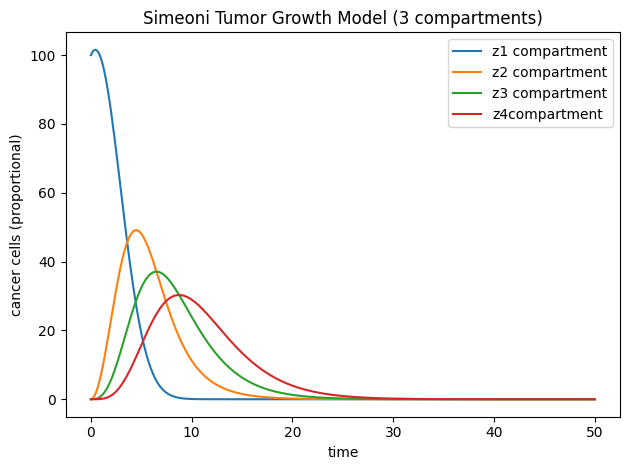

consts = 0.5


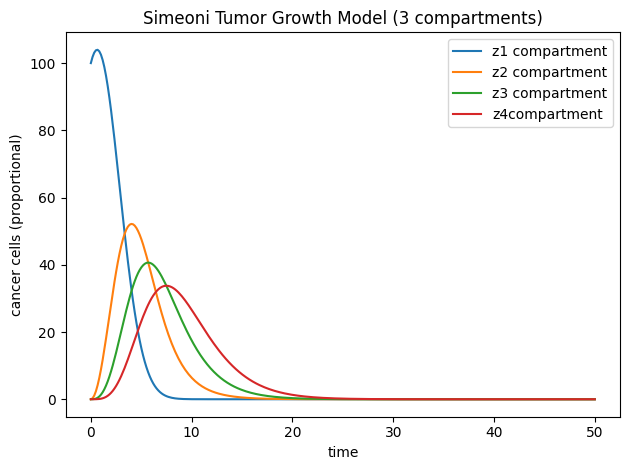

consts = 0.6


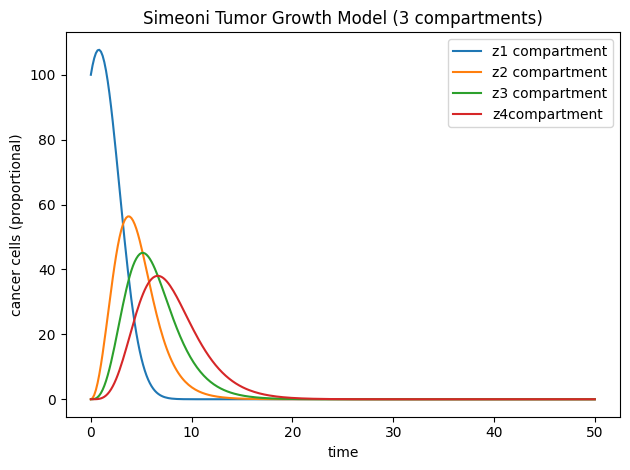

consts = 0.7


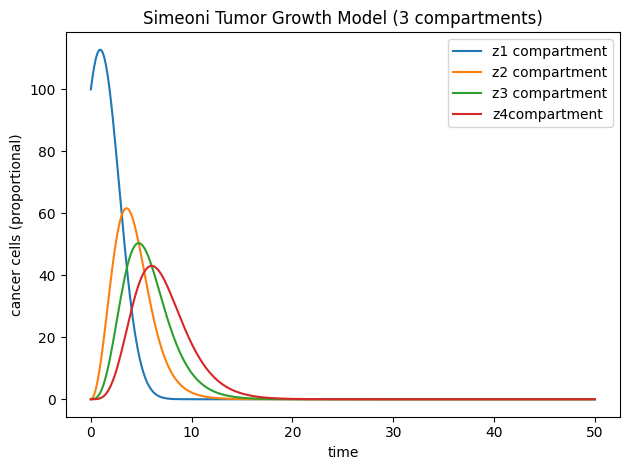

consts = 0.8


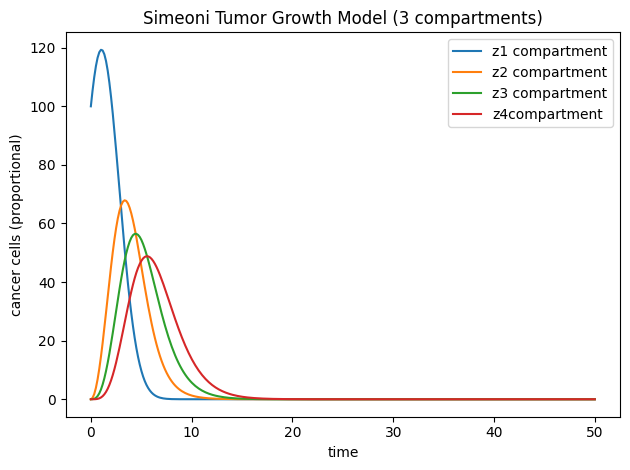

consts = 0.9


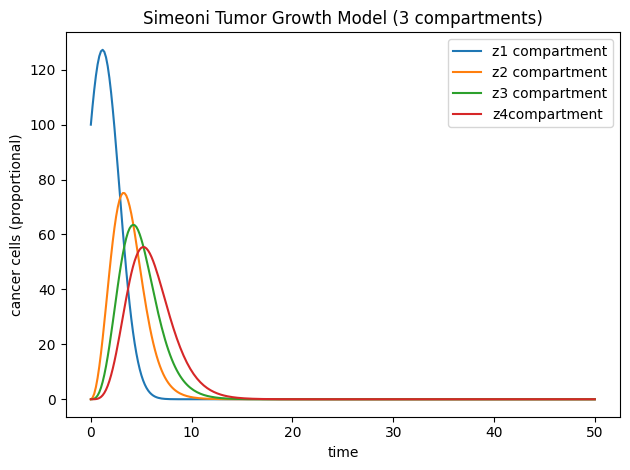

In [30]:
#plot a bunch and see what happens
#all constants are the same and are less than 1
for i in range(1, 10):
    print("consts =", i/10)
    simeoni_3(lambda0=i/10, lambda1=i/10, psi=i/10, k1 = i/10, k2=i/10, V0 = 100)
#

As time goes on the higher the consts the less cancer there is. We need to look at the different constants though to figure out what affects it the most.